# ML Pipeline Preparation
Follow the instructions below to help you create your ML pipeline.
### 1. Import libraries and load data from database.
- Import Python libraries
- Load dataset from database with [`read_sql_table`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_sql_table.html)
- Define feature and target variables X and Y

In [128]:
import pandas as pd
import numpy as np

from sqlalchemy import create_engine

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

from sklearn.pipeline import Pipeline
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
db_filename = 'DisasterResponse.db'
db_tablename = 'messages'

In [10]:
labels = [ 
 'related',
 'request',
 'offer',
 'aid_related',
 'medical_help',
 'medical_products',
 'search_and_rescue',
 'security',
 'military',
 'child_alone',
 'water',
 'food',
 'shelter',
 'clothing',
 'money',
 'missing_people',
 'refugees',
 'death',
 'other_aid',
 'infrastructure_related',
 'transport',
 'buildings',
 'electricity',
 'tools',
 'hospitals',
 'shops',
 'aid_centers',
 'other_infrastructure',
 'weather_related',
 'floods',
 'storm',
 'fire',
 'earthquake',
 'cold',
 'other_weather',
 'direct_report'
]

In [152]:
# load data from database
engine = create_engine(f'sqlite:///{db_filename}')
df = pd.read_sql_table(db_tablename, engine)
X = df.message
Y = df[labels]

### 2. Write a tokenization function to process your text data

In [35]:
import re

url_regex = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
url_placeholder = '_URL_'

lemmatizer = WordNetLemmatizer()

def create_placeholder_for_urls(text):
    return re.sub(url_regex, url_placeholder, text)

def tokenize(text):
    lower_text = text.lower().strip()
    placeholder_text = create_placeholder_for_urls(lower_text)
    tokens = word_tokenize(placeholder_text)
    return list(map(lemmatizer.lemmatize, tokens))

### 3. Build a machine learning pipeline
This machine pipeline should take in the `message` column as input and output classification results on the other 36 categories in the dataset. You may find the [MultiOutputClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputClassifier.html) helpful for predicting multiple target variables.

### 4. Train pipeline
- Split data into train and test sets
- Train pipeline

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, Y)

In [157]:
pipeline = Pipeline([
        ('vectorizer', CountVectorizer(tokenizer=tokenize)),
        ('tfidf', TfidfTransformer()),
        ('classifier', MultiOutputClassifier(RandomForestClassifier(n_estimators = 10)))
])

In [158]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function toke...
                 MultiOutputClassifier(estimator=RandomForestClassifier(bootstrap=True,
                                                                        class_weight=None,
                                                                        criterion='gini',
                                                                   

In [159]:
y_pred = pipeline.predict(X_test)

In [126]:
def display_results(column_name, column_index, y_test, y_pred):
    
    curr_y_test = y_test[[column_name]]
    curr_y_pred = y_pred[:, column_index]
    
    labels = [0,1] # np.unique(curr_y_test)
    confusion_mat = confusion_matrix(curr_y_test, curr_y_pred, labels=labels)
    accuracy = (curr_y_test[column_name] == curr_y_pred).mean()

    print("Labels:", labels)
    print("Confusion Matrix:\n", confusion_mat)
    print("Accuracy:", accuracy)

In [127]:
for idx, name in enumerate(list(y_test.columns)):
    
    print(f'Category: {name} at index {idx}')
    
    display_results(name, idx, y_test, y_pred)
    
    print('\n\n')

Category: related at index 0
Labels: [0, 1]
Confusion Matrix:
 [[ 518 1026]
 [ 355 4607]]
Accuracy: 0.7832263978001833



Category: request at index 1
Labels: [0, 1]
Confusion Matrix:
 [[5392   87]
 [ 664  403]]
Accuracy: 0.8852734494347694



Category: offer at index 2
Labels: [0, 1]
Confusion Matrix:
 [[6517    0]
 [  29    0]]
Accuracy: 0.9955698136266422



Category: aid_related at index 3
Labels: [0, 1]
Confusion Matrix:
 [[3373  479]
 [1292 1402]]
Accuracy: 0.7294531011304614



Category: medical_help at index 4
Labels: [0, 1]
Confusion Matrix:
 [[5973   27]
 [ 515   31]]
Accuracy: 0.9172013443324167



Category: medical_products at index 5
Labels: [0, 1]
Confusion Matrix:
 [[6208   18]
 [ 282   38]]
Accuracy: 0.9541704857928506



Category: search_and_rescue at index 6
Labels: [0, 1]
Confusion Matrix:
 [[6333    5]
 [ 203    5]]
Accuracy: 0.9682248701497097



Category: security at index 7
Labels: [0, 1]
Confusion Matrix:
 [[6428    2]
 [ 116    0]]
Accuracy: 0.9819737244118546


In [118]:
display_results(y_test, y_pred)

Labels: [0, 1]
Confusion Matrix:
 [[5392   87]
 [ 664  403]]
Accuracy: 0.8852734494347694


### 5. Test your model
Report the f1 score, precision and recall for each output category of the dataset. You can do this by iterating through the columns and calling sklearn's `classification_report` on each.

In [172]:
print(classification_report(y_test.values, y_pred, target_names=labels, output_dict = False))

                        precision    recall  f1-score   support

               related       0.83      0.93      0.88      5011
               request       0.85      0.38      0.53      1127
                 offer       0.00      0.00      0.00        31
           aid_related       0.75      0.53      0.62      2656
          medical_help       0.52      0.06      0.11       531
      medical_products       0.69      0.12      0.20       307
     search_and_rescue       0.73      0.08      0.15       190
              security       1.00      0.01      0.02       125
              military       0.55      0.08      0.14       215
           child_alone       0.00      0.00      0.00         0
                 water       0.86      0.35      0.50       387
                  food       0.84      0.26      0.40       702
               shelter       0.83      0.18      0.30       552
              clothing       0.67      0.15      0.25        93
                 money       0.86      

In [176]:
report = classification_report(y_test.values, y_pred, target_names=labels, output_dict = True)

In [184]:
def map_with_key(key):
    result = report.get(key)
    result['category'] = key
    return result

In [187]:
df_metrics = pd.DataFrame(list(map(map_with_key, labels)))
df_metrics.head(20)

,precision,recall,f1-score,support,category
0,0.825964,0.931950,0.875762,5011,related
1,0.849505,0.380657,0.525735,1127,request
2,0.000000,0.000000,0.000000,31,offer
3,0.754424,0.529744,0.622429,2656,aid_related
4,0.524590,0.060264,0.108108,531,medical_help
5,0.692308,0.117264,0.200557,307,medical_products
6,0.727273,0.084211,0.150943,190,search_and_rescue
7,1.000000,0.008000,0.015873,125,security
8,0.548387,0.079070,0.138211,215,military
9,0.000000,0.000000,0.000000,0,child_alone


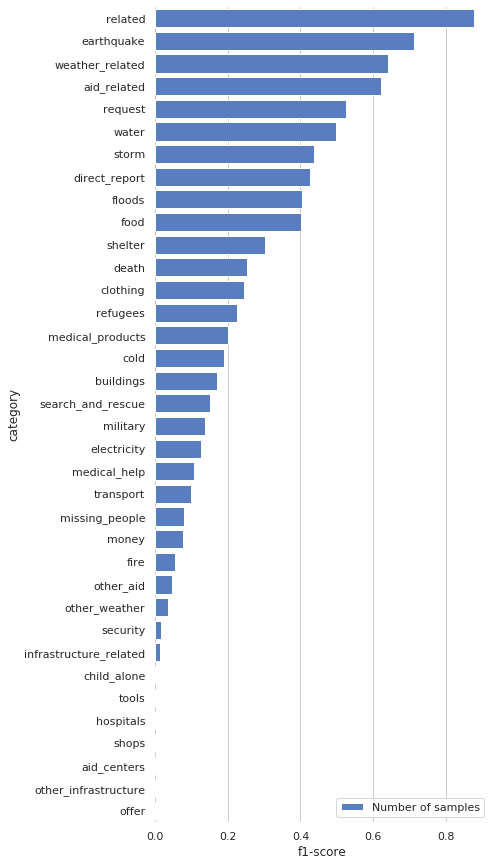

In [191]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
 
f, ax = plt.subplots(figsize=(6, 15))
 
sns.set_color_codes("muted")
sns.barplot(x="f1-score", y="category", data=df_metrics.sort_values(by = 'f1-score', ascending = False), label="Number of samples", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True)

sns.despine(left=True, bottom=True)

### 6. Improve your model
Use grid search to find better parameters. 

In [ ]:
parameters = 

cv = 

### 7. Test your model
Show the accuracy, precision, and recall of the tuned model.  

Since this project focuses on code quality, process, and  pipelines, there is no minimum performance metric needed to pass. However, make sure to fine tune your models for accuracy, precision and recall to make your project stand out - especially for your portfolio!

### 8. Try improving your model further. Here are a few ideas:
* try other machine learning algorithms
* add other features besides the TF-IDF

### 9. Export your model as a pickle file

### 10. Use this notebook to complete `train.py`
Use the template file attached in the Resources folder to write a script that runs the steps above to create a database and export a model based on a new dataset specified by the user.